# Project

## Packages

In [19]:
from bs4 import BeautifulSoup # to parse external data
import yfinance as yf
import pandas as pd # to read CSV files
import requests # to get data
import spacy #to extraxt entities
import matplotlib.pyplot as plt

## RSS feeds

In [2]:
# Check if data from the page are downloadable
yahoo = requests.get("https://finance.yahoo.com/news/rssindex")
yahoo

<Response [200]>

In [3]:
# Get headlines
Tyahoo = BeautifulSoup(yahoo.content, features='xml')
TY = Tyahoo.findAll('title')
TY # list of titles

[<title>Yahoo Finance</title>,
 <title>Yahoo Finance</title>,
 <title>Here's The 'New AT&amp;T' If You Want A Rock-Solid Dividend</title>,
 <title>The ‘best job in America’ pays $145,000 and has 14,000 job openings — and offers a generous work-life balance</title>,
 <title>Google is finally splitting its stock; will Amazon be next, leading to a Dow shakeup?</title>,
 <title>I’ll be 65 soon, have $320,000 in retirement savings and a paid-off home but I’m $46,000 in debt – should I take more money out of my investments?</title>,
 <title>Forget the 4 for $4, Wendy's Has a New Deal on Its Menu</title>,
 <title>Why PayPal stock is plunging</title>,
 <title>What 401(k) and IRA critics are missing</title>,
 <title>3 Dividend Stocks With Up to 6% Yield and Strong Analyst Support</title>,
 <title>Alphabet Seeks More Investors in 20-for-1 Stock Split</title>,
 <title>4 Lessons From ARK’s Rapid Rise—and Fall</title>,
 <title>How a New Supreme Court Decision Could Help You Save For Retirement</tit

In [4]:
wsj = requests.get("https://feeds.a.dj.com/rss/RSSMarketsMain.xml?fbclid=IwAR17gY8vV2SdoTLP_35v7zGYmPireg5xIX_y1VEgPYRoXVd5jVouoKRlXAc")
wsj

<Response [200]>

In [5]:
Twsj = BeautifulSoup(wsj.content, features='xml')
TW = Twsj.findAll('title')
TW

[<title>WSJ.com: Markets</title>,
 <title>WSJ.com: Markets</title>,
 <title>Stocks End Higher After Strong Alphabet Earnings</title>,
 <title>Europe's Energy Crisis Eases Even as Ukraine-Russia Tensions Build</title>,
 <title>EA Will Stand Fine Alone</title>,
 <title>Activist Investors Take Aim at U.K. Inc.</title>,
 <title>PayPal Shares Sink as Company Drops Growth Strategy</title>,
 <title>Growth Hedge Funds Suffer Worst Rout in Years</title>,
 <title>PayPal's Downshift Shows Two-Speed Spending Outlook</title>,
 <title>Rents Are Rising and So Are Mortgage Rates. What's a Home Buyer to Do?</title>,
 <title>OPEC, Allies Agree to Pump More Oil Amid Supply Concerns</title>,
 <title>What the Stock Split by Google's Parent Alphabet Means</title>,
 <title>Alphabet, PayPal, AMD, Meta, Starbucks: What to Watch in the Stock Market Today</title>,
 <title>GM Signals an Easing of the Car Shortage</title>,
 <title>Ripple's Legal Brawl With SEC Could Help Settle When Cryptocurrencies Are Securities

In [6]:
cnbc = requests.get("https://www.cnbc.com/id/15839135/device/rss/rss.html?fbclid=IwAR2o0zeWtmgEwZob45_F6e02pkTVo9uBGL0VI1GQv8mPyScEFY-hn9t089Y")
cnbc

<Response [200]>

In [7]:
Tcnbc = BeautifulSoup(cnbc.content, features='xml')
TC = Tcnbc.findAll('title')
TC

[<title>Earnings</title>,
 <title>Facebook shares plunge more than 20% on weak earnings, big forecast miss</title>,
 <title>Qualcomm beats expectations for revenue and earnings, sales up 30%</title>,
 <title>Alphabet reports big fourth-quarter beat; stock pops</title>,
 <title>AMD rises 10% after issuing strong 2022 sales outlook</title>,
 <title>GM forecasts earnings 'at or near record levels' in 2022 as chip shortage eases</title>,
 <title>Starbucks earnings miss as higher costs weigh on profits, coffee chain cuts earnings outlook</title>,
 <title>PayPal stock plunges on weak earnings guidance </title>,
 <title>Exxon Mobil's fourth-quarter profit tops estimates as oil and gas prices soar; shares rise</title>,
 <title>UBS quarterly profit drops to $1.35 billion, but the Swiss bank set ambitious new earnings targets</title>,
 <title>Chevron shares retreat from a record after fourth-quarter profit falls short of expectations</title>,
 <title>Atlassian jumps as quarterly results top esti

## Extract entities

In [8]:
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm") # en_core_web_sm - basic NLP task (to process extracted text data)

In [9]:
processed_hline = nlp(TC[1].text) #Get first headline
print(TC[1])
for token in processed_hline:
    print(token.text, "-----", spacy.explain(token.pos_),'-----', spacy.explain(token.dep_)) # tokens + tags + dependencies

<title>Facebook shares plunge more than 20% on weak earnings, big forecast miss</title>
Facebook ----- proper noun ----- compound
shares ----- noun ----- nominal subject
plunge ----- verb ----- None
more ----- adjective ----- adjectival modifier
than ----- adposition ----- modifier of quantifier
20 ----- numeral ----- numeric modifier
% ----- noun ----- direct object
on ----- adposition ----- prepositional modifier
weak ----- adjective ----- adjectival modifier
earnings ----- noun ----- object of preposition
, ----- punctuation ----- punctuation
big ----- adjective ----- adjectival modifier
forecast ----- noun ----- direct object
miss ----- noun ----- direct object


In [10]:
# See the dependencies
spacy.displacy.render(processed_hline, style='dep', jupyter=True, options={'distance': 110}) 

In [11]:
# Show important entities; tag ORG = Companies
spacy.displacy.render(processed_hline, style='ent', jupyter=True, options={'distance': 120}) 

In [15]:
# All headlines
headlines = TC + TW + TY

In [16]:
# Extract ORG from headlines
companies = []
for title in headlines:
    doc = nlp(title.text)
    for token in doc.ents:
        if token.label_ == 'ORG':
            companies.append(token.text)
        else: 
            pass
        
companies

['AMD',
 'GM',
 'PayPal',
 "Exxon Mobil's",
 'UBS',
 'Chevron',
 'Apple',
 'Southwest Airlines',
 "McDonald's",
 'Deutsche Bank',
 'ServiceNow',
 'Qualtrics',
 'Intel',
 'Boeing',
 'Microsoft',
 'J&J',
 'IBM',
 'American Airlines',
 'United',
 'P&G',
 'Morgan Stanley',
 'Bank of America',
 'EA',
 'U.K. Inc.',
 'PayPal',
 'OPEC',
 "Google's",
 'PayPal',
 'AMD',
 'Meta',
 'GM Signals an Easing of the Car Shortage',
 "Ripple's Legal Brawl With",
 'SEC',
 'Cryptocurrencies Are Securities',
 'Match Hopes Hinge Can Be Its Knight',
 'Bond Market Hints at Calm After Disruptive Selloff',
 'AT&T',
 'Amazon',
 'Dow',
 "Wendy's",
 'Menu',
 'Yield',
 'Strong Analyst Support',
 'ARK',
 'New Supreme Court Decision',
 'HELOC',
 'AT&T',
 'PayPal Plunges',
 'IRS',
 'ARK',
 'Social Media Stocks',
 'Focus As Snap',
 'Spinoff',
 'AT&T',
 'WarnerMedia',
 'CNN',
 'Alphabet',
 'AOC',
 'Apple',
 'Thai Exchange',
 'Toyota',
 'Amazon Earnings']

In [17]:
stocks_df = pd.read_csv('./SP500.csv') ## https://github.com/datasets/s-and-p-500-companies
stocks_df.head() 

,Name,Symbol,Sector
0,3M,MMM,Industrials
1,A. O. Smith,AOS,Industrials
2,Abbott,ABT,Health Care
3,AbbVie,ABBV,Health Care
4,Abiomed,ABMD,Health Care


In [18]:
# attributes of stocks
stock_dict = {
    'Org': [],
    'Symbol': [],
    'Sector': [],
    'currentPrice': [],
    'dayHigh': [],
    'dayLow': [],
    'forwardPE': [],
    'dividendYield': []
}

# collecting information
for company in companies:
    try:
        if stocks_df['Name'].str.contains(company).sum():
            symbol = stocks_df[stocks_df['Name'].\
                                str.contains(company)]['Symbol'].values[0]
            org_name = stocks_df[stocks_df['Name'].\
                                str.contains(company)]['Name'].values[0]
            stock_dict['Org'].append(org_name)
            stock_dict['Symbol'].append(symbol)
            stock_info = yf.Ticker(symbol).info
            stock_dict['Sector'].append(stock_info['sector'])
            stock_dict['currentPrice'].append(stock_info['currentPrice'])
            stock_dict['dayHigh'].append(stock_info['dayHigh'])
            stock_dict['dayLow'].append(stock_info['dayLow'])
            stock_dict['forwardPE'].append(stock_info['forwardPE'])
            stock_dict['dividendYield'].append(stock_info['dividendYield'])
        else:
            pass
    except:
        pass

# dataframe
pd.DataFrame(stock_dict)


,Org,Symbol,Sector,currentPrice,dayHigh,dayLow,forwardPE,dividendYield
0,AMD,AMD,Technology,122.76,130.0000,120.6400,30.014670,NaN
1,MGM Resorts International,MGM,Consumer Cyclical,43.64,44.3900,43.3100,44.989690,0.0002
2,PayPal,PYPL,Financial Services,132.57,139.9000,129.0100,20.055977,NaN
3,Chevron,CVX,Energy,135.41,135.8000,132.8000,14.654762,0.0421
4,Apple,AAPL,Technology,175.84,175.8800,173.3387,26.886850,0.0050
5,Southwest Airlines,LUV,Industrials,44.29,44.9700,43.5800,13.544343,NaN
6,McDonald's,MCD,Consumer Cyclical,262.28,262.5950,258.4900,23.650135,0.0213
7,ServiceNow,NOW,Technology,581.15,594.8500,573.1550,62.288320,NaN
8,Intel,INTC,Technology,49.51,49.5800,48.0900,13.453804,0.0298
9,Boeing,BA,Industrials,207.52,208.3857,203.2100,27.930016,NaN


<BarContainer object of 7 artists>

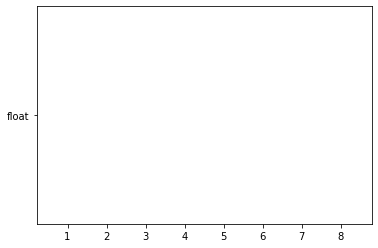

In [22]:
df = pd.DataFrame(stock_dict)